# Rendimiento de GPU vs CPU

In [1]:
from pycuda import autoinit, gpuarray
import time

In [2]:
def getTime(fun,n):
    timer = time.time()
    fun(n)
    return - timer + time.time() 

In [3]:
def dummy(n):
    j = 0
    for i in range(n):
        j += 1

In [4]:
getTime(dummy,12)

1.9073486328125e-06

# Get randoms

In [5]:
from pycuda import curandom
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


    Vamos a trabajar con precision variable definida por:

In [7]:
dprec = np.float32 # o np.float64

In [8]:
random = curandom.XORWOWRandomNumberGenerator()

In [9]:
def getRND_GPU_1D(n,r = False):
    real = random.gen_uniform(n,dprec)
    if r:
        plot(real.get())
    real.gpudata.free()
        
def getRND_GPU_2D(n,r = False):
    real = random.gen_uniform([n,n],dprec)
    if r:
        imshow(real.get())
        colorbar()
    real.gpudata.free()
        
def getRND_GPU_3D(n,r = False):
    real = random.gen_uniform([n,n,n],dprec)
    if r:
        imshow(real.get()[0,:,:])
        colorbar()
    real.gpudata.free()

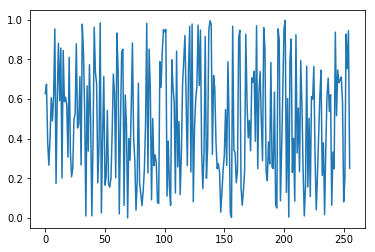

In [10]:
getRND_GPU_1D(256,r=True)

In [11]:
real = random.gen_uniform(1024,dprec)

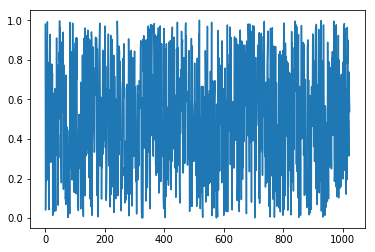

In [12]:
plot(real.get())

In [13]:
real.gpudata.free()

In [14]:
def getRND_CPU_1D(n,r = False,gtt = False):
    real = np.random.rand(int(n)).astype(dprec)
    if r:
        plot(real)
    if gtt:
        return real

def getRND_CPU_2D(n,r = False,gtt = False):
    real = np.random.rand(int(n),int(n)).astype(dprec)
    if r:
        imshow(real)
        colorbar()
    if gtt:
        return real
        
def getRND_CPU_3D(n,r = False,gtt = False):
    real = np.random.rand(int(n),int(n),int(n)).astype(dprec)
    if r:
        imshow(real[0,:,:])
        colorbar()
    if gtt:
        return real

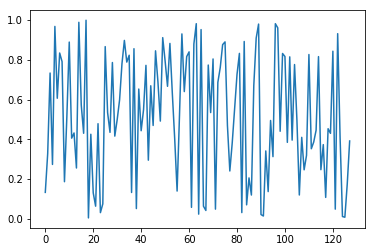

In [15]:
getRND_CPU_1D(128,r=True)

Time ratios cpu/gpu = 0.322621131552


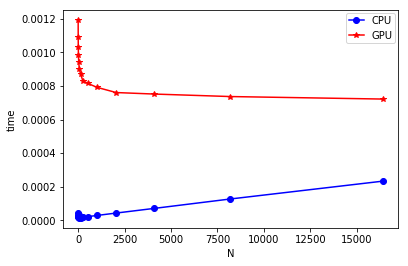

In [16]:
cpuTime = []
gpuTime = []
nDim = []
for i in range(1,15):
    averT1 = 0
    averT2 = 0
    for j in range(10):
            averT1 += getTime(getRND_CPU_1D,2**i)
            averT2 += getTime(getRND_GPU_1D,2**i)
    cpuTime.append(averT1/10.)
    gpuTime.append(averT2/10.)
    nDim.append(2**i)
plot(nDim,cpuTime,'b-o', label ='CPU')
plot(nDim,gpuTime,'r*-', label ='GPU')
legend(loc=1,labelspacing=0.5,fancybox=True, handlelength=1.5, borderaxespad=0.25, borderpad=0.25)
xlabel('N')
ylabel('time')
print 'Time ratios cpu/gpu =', cpuTime[-1]/gpuTime[-1]

Time ratios cpu/gpu = 31.387065588


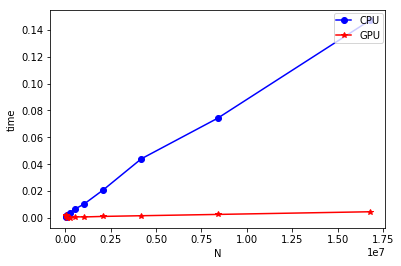

In [17]:
cpuTime = []
gpuTime = []
nDim = []
for i in range(15,25):
    averT1 = 0
    averT2 = 0
    for j in range(10):
            averT1 += getTime(getRND_CPU_1D,2**i)
            averT2 += getTime(getRND_GPU_1D,2**i)
    cpuTime.append(averT1/10.)
    gpuTime.append(averT2/10.)
    nDim.append(2**i)
plot(nDim,cpuTime,'b-o', label ='CPU')
plot(nDim,gpuTime,'r*-', label ='GPU')
legend(loc=1,labelspacing=0.5,fancybox=True, handlelength=1.5, borderaxespad=0.25, borderpad=0.25)
xlabel('N')
ylabel('time')
print 'Time ratios cpu/gpu =', cpuTime[-1]/gpuTime[-1]

Time ratios cpu/gpu = 35.0205329577


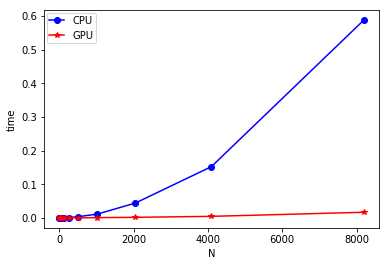

In [18]:
cpuTime = []
gpuTime = []
nDim = []
for i in range(1,14):
    averT1 = 0
    averT2 = 0
    for j in range(10):
            averT1 += getTime(getRND_CPU_2D,2**i)
            averT2 += getTime(getRND_GPU_2D,2**i)
    cpuTime.append(averT1/10.)
    gpuTime.append(averT2/10.)
    nDim.append(2**i)
plot(nDim,cpuTime,'b-o', label ='CPU')
plot(nDim,gpuTime,'r*-', label ='GPU')
legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=1.5, borderaxespad=0.25, borderpad=0.25)
xlabel('N')
ylabel('time')
print 'Time ratios cpu/gpu =', cpuTime[-1]/gpuTime[-1]

Time ratios cpu/gpu = 35.689221969


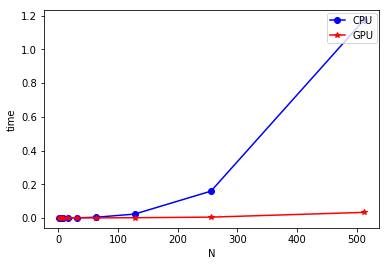

In [19]:
cpuTime = []
gpuTime = []
nDim = []
for i in range(1,10):
    averT1 = 0
    averT2 = 0
    for j in range(10):
            averT1 += getTime(getRND_CPU_3D,2**i)
            averT2 += getTime(getRND_GPU_3D,2**i)
    cpuTime.append(averT1/10.)
    gpuTime.append(averT2/10.)
    nDim.append(2**i)
plot(nDim,cpuTime,'b-o', label ='CPU')
plot(nDim,gpuTime,'r*-', label ='GPU')
legend(loc=1,labelspacing=0.5,fancybox=True, handlelength=1.5, borderaxespad=0.25, borderpad=0.25)
xlabel('N')
ylabel('time')
print 'Time ratios cpu/gpu =', cpuTime[-1]/gpuTime[-1]

Some notions of the sizes. The double precision takes 64bit or 8 bytes of memory. If you think in single precision is just half. 
## $1MB = 2^{20} Bytes$

|Points fp64|size 1D (MB)|size 2D (MB)|size 3D (MB)|
|:---:|:---:|:---:|:---:|
|128|0.001|0.125|16|
|256|0.002|0.5|128|
|512|0.004|2|1024|
|1024|0.008|8|8192|
|4096|0.031|128|512G!|
|32768|0.25|8192|

In [17]:
1024/2.**10

1.0

In [3]:
MByte = 2.**20

In [4]:
FPSize = 8

In [11]:
sizes = [2.**i for i in range(8,20)]
sizes

[256.0,
 512.0,
 1024.0,
 2048.0,
 4096.0,
 8192.0,
 16384.0,
 32768.0,
 65536.0,
 131072.0,
 262144.0,
 524288.0]

In [19]:
for i in sizes:
    print '{0}   {1:.3f}'.format(i,i**1*FPSize/MByte)

256.0   0.002
512.0   0.004
1024.0   0.008
2048.0   0.016
4096.0   0.031
8192.0   0.062
16384.0   0.125
32768.0   0.250
65536.0   0.500
131072.0   1.000
262144.0   2.000
524288.0   4.000


In [20]:
for i in sizes:
    print '{0}^2   {1:.3f}'.format(i,i**2*FPSize/MByte)

256.0^2   0.500
512.0^2   2.000
1024.0^2   8.000
2048.0^2   32.000
4096.0^2   128.000
8192.0^2   512.000
16384.0^2   2048.000
32768.0^2   8192.000
65536.0^2   32768.000
131072.0^2   131072.000
262144.0^2   524288.000
524288.0^2   2097152.000


In [22]:
for i in sizes:
    print '{0}^3   {1:.3f}'.format(i,i**3*FPSize/MByte)

256.0^3   128.000
512.0^3   1024.000
1024.0^3   8192.000
2048.0^3   65536.000
4096.0^3   524288.000
8192.0^3   4194304.000
16384.0^3   33554432.000
32768.0^3   268435456.000
65536.0^3   2147483648.000
131072.0^3   17179869184.000
262144.0^3   137438953472.000
524288.0^3   1099511627776.000


In [18]:
524288./2**10

512.0

In [34]:
512**3

134217728

In [35]:
sqrt(512**3)

11585.237502960395

In [36]:
# size by real maesh x complex x nspinor x arrays required by method
128 * 2 * 3 * 4

3072

In [37]:
(1024.**1)*8/1024**2

0.0078125

# Simple sum of Arrays.

Ahora vamos a realizar un test de como sumar dos arrays. Existe dos formas de utilizar CUDA en el entorno de pyCUDA para realizar operaciones sencillas. Por un lado tenemos lo GPUarrays que son gestionado en pyCUDA y por el otro tambien podemos hacer uso de 'KERNELS' que vendrian siendo funciones de CUDA puro.

In [38]:
from pycuda.compiler import SourceModule # Esta libreria es para compilar y usar kernels en CUDA, ( son funciones CUDA ) 

In [39]:
# Funciones para generar unos en GPU y CPU, ojo 'return' solo regresa el puntero o direccion de donde fueron generados los datos.
def getOnesArryGPU(dims):
    return gpuarray.zeros(dims,dtype=dprec)
def getOnesArryCPU(dims):
    return np.zeros(dims).astype(dprec)

In [40]:
cuFun = SourceModule("""
             #include <pycuda-helpers.hpp>
 
             __global__ void sumArray( double *dest, double *arr1, double *arr2)
             {
                int t_i = blockIdx.x*blockDim.x + threadIdx.x;
                int t_j = blockIdx.y*blockDim.y + threadIdx.y;
                int t_k = blockIdx.z*blockDim.z + threadIdx.z;
                int tid = t_i + t_j*blockDim.x*gridDim.x + t_k*blockDim.x*gridDim.x*blockDim.y*gridDim.y;
                dest[tid] = arr1[tid]+arr2[tid];
             }
             """)
sumGPU = cuFun.get_function('sumArray')
def prepareGPU(dims):
    sumGPU.prepared_call() # Este tipo de ejecucion nos evita errores a la hora de pasar los argumentos

In [41]:
def sumArry(a,b):
    timer = time.time()
    c = a+b
    return - timer + time.time()

In [42]:
a = getOnesArry([128,128,128])
b = getOnesArry([128,128,128])
sumArry(a,b)

NameError: name 'getOnesArry' is not defined

In [43]:
from pyfft.cuda import Plan
from pycuda.driver import Event,mem_get_info

In [4]:
myPrec = np.complex128
N = 512
A_cpu = np.ones([N,N,N],dtype=myPrec)
A_gpu = gpuarray.to_gpu(A_cpu)

In [5]:
applyFFT = Plan((N,N,N),dtype=myPrec)

In [6]:
applyFFT.execute(A_gpu)

In [7]:
A_gpu

array([[[  1.34217728e+08+0.j,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  0.00000000e+00+0.j,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  0.00000000e+00+0.j,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        ..., 
        [  0.00000000e+00+0.j,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  0.00000000e+00+0.j,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  0.00000000e+00+0.j,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.

In [11]:
mem_get_info()[0]/(1024*1024.),mem_get_info()[1]/(1024*1024.)

(1214.6171875, 5375.4375)